In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random, time
from IPython.display import clear_output, display, Javascript

def auto_scroll():
    display(Javascript('document.getElementById("site").scrollTo(0, document.getElementById("site").scrollHeight);'))

SZ = 28 * 28

data = np.frombuffer(open("/home/agriffini/checkout/talks/pycon2025/data0.dat", "rb").read(), np.uint8)
data = data.reshape(-1, SZ+1)
print(len(data), "samples")

one_hot = -np.ones((len(data), 10), np.float32)
one_hot[np.arange(len(data)), data[:,SZ] - ord('0')] = 1

data = np.float32(((data - 127.5) / 127.5))
data[:, SZ] = 1

network = np.float32((np.random.random((10, SZ+1)) - 0.5) / SZ)


50000 samples


In [3]:
def ssign(x):
    return x / (1 + abs(x))

def loss(batch):
    return np.sum([(ssign(np.sum(data[i] * network[j])) - one_hot[i][j]) ** 2
                   for j in range(10) for i in batch]) / len(batch)

def accuracy(batch):
    return np.sum([one_hot[i][np.argmax([np.sum(data[i] * network[j]) for j in range(10)])] == 1
                   for i in batch]) / len(batch)
    
batch_size = 200

samples = list(range(len(data)))
random.shuffle(samples)
validation = samples[:batch_size]
training = samples[batch_size:]
count = 0
XX = []
YY = []
ZZ = []

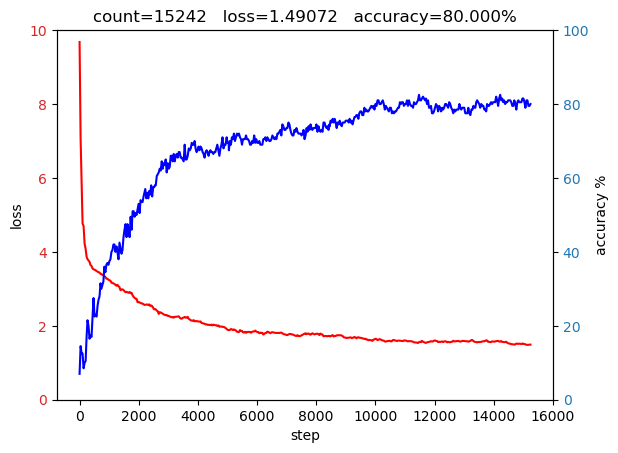

<IPython.core.display.Javascript object>

In [12]:
start = time.time()
show = start - 1
flat_network = network.ravel()
while time.time() < start + 60:
    count += 1
    batch = random.sample(training, batch_size)
    v0 = loss(batch)
    i = random.randrange(len(flat_network))
    old = flat_network[i]
    flat_network[i] += random.random() - 0.5
    v1 = loss(batch)
    if v0 < v1:
        flat_network[i] = old # undo bad step
    if time.time() > show:
        XX.append(count)
        YY.append(loss(validation))
        ZZ.append(accuracy(validation) * 100)
        clear_output(wait=True)
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.set_xlabel("step")
        ax1.set_ylabel("loss")
        ax1.set_ylim(0, 10)
        ax1.tick_params(axis='y', labelcolor='tab:red')
        ax2.set_xlabel("step")
        ax2.set_ylabel("accuracy %")
        ax2.set_ylim(0, 100)
        ax2.tick_params(axis='y', labelcolor='tab:blue')
        ax1.plot(XX, YY, color="red")
        ax2.plot(XX, ZZ, color="blue")
        plt.title("count=%i   loss=%.5f   accuracy=%.3f%%" % (count, YY[-1], ZZ[-1]))
        plt.show()
        auto_scroll()
        show = time.time() + 1